In [1]:
import matplotlib.pyplot as plt
import numpy as np

Converged after 7 iterations.
Approximate Root: 1.521380


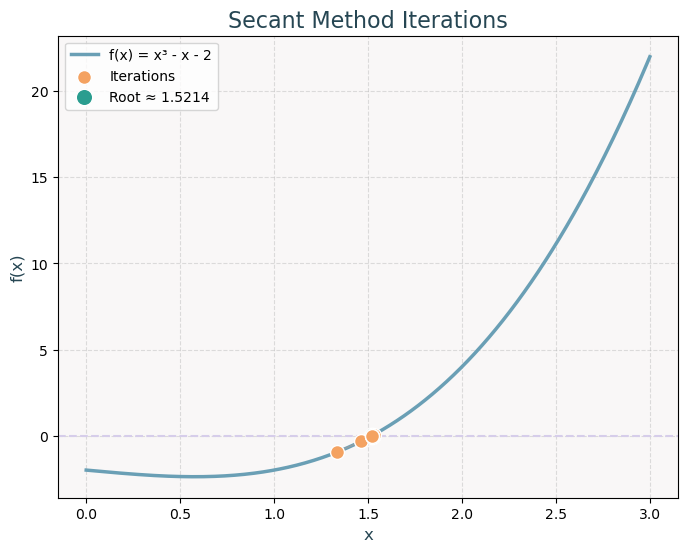

In [2]:

def f(x):
    return x**3 - x - 2


def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iterations = []
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if f1 - f0 == 0:
            print("Zero division error — bad initial guesses!")
            return None
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        iterations.append(x2)
        if abs(x2 - x1) < tol:
            print(f"Converged after {i+1} iterations.")
            return x2, iterations
        x0, x1 = x1, x2
    print("Did not converge within max iterations.")
    return None, iterations

root, steps = secant_method(f, 1, 2)
print(f"Approximate Root: {root:.6f}")

x = np.linspace(0, 3, 400)
y = f(x)

plt.figure(figsize=(8,6))
plt.plot(x, y, color='#6A9FB5', linewidth=2.5, label='f(x) = x³ - x - 2') 
plt.axhline(0, color='#D6CDEA', linewidth=1.5, linestyle='--')  

plt.scatter(steps, [f(s) for s in steps], color='#F4A261', edgecolor='white', s=100, zorder=5, label='Iterations') 

plt.scatter(root, f(root), color='#2A9D8F', s=140, edgecolor='white', label=f'Root ≈ {root:.4f}')  

for i in range(len(steps)-1):
    plt.plot([steps[i], steps[i+1]], [f(steps[i]), f(steps[i+1])], color='#A0A0A0', linestyle='-', linewidth=1.2, alpha=0.7)

plt.title('Secant Method Iterations', fontsize=16, color='#264653')
plt.xlabel('x', fontsize=12, color='#264653')
plt.ylabel('f(x)', fontsize=12, color='#264653')
plt.grid(True, linestyle='--', alpha=0.4)
plt.gca().set_facecolor('#F9F7F7')  
plt.legend()
plt.show()